<a href="https://colab.research.google.com/github/varsha1311/KMeans-Cluster/blob/main/TASK__02_Kmeans_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NAME : VARSHA J**
### The Sparks Foundation 
### Data Science and Business Analytics
## TASK 02: Prediction using Unsupervised ML

In [131]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
%matplotlib inline

Loading the dataset

In [132]:
data = datasets.load_iris()

In [133]:
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [134]:
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [135]:
x = pd.DataFrame(iris.data, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [137]:
x.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [138]:
y.head(5)

,Target
0,0
1,0
2,0
3,0
4,0


Visualization

In [139]:
colors = np.array(['orange', 'green', 'red'])
iris_targets_legend = np.array(iris.target_names)
orange_patch = mpatches.Patch(color='orange', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
red_patch = mpatches.Patch(color='red', label='Virginica')

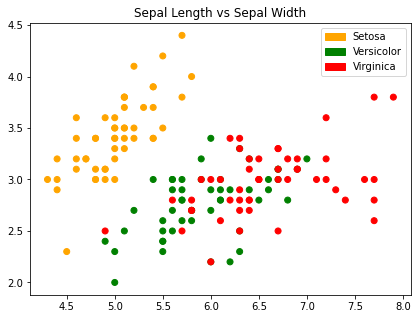

In [140]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[y['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[orange_patch, green_patch, red_patch])



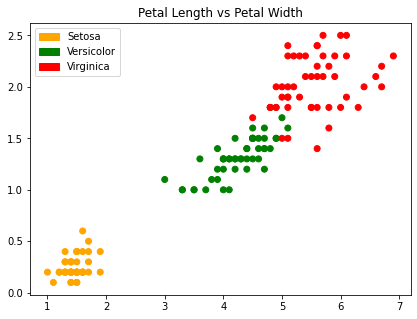

In [141]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c= colors[y['Target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[orange_patch, green_patch, red_patch])

Fitting the model

In [142]:
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [143]:
print(iris_k_mean_model.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


### Clusters visualization of Petal and Sepal

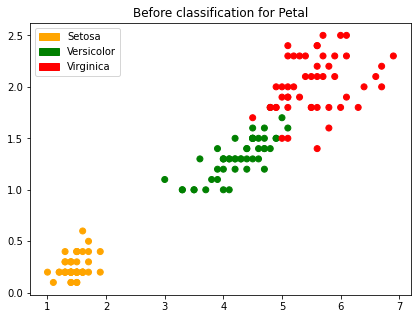

In [144]:
plt.figure(figsize=(15,5))

colors = np.array(['orange', 'green', 'red'])

predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[y['Target']])
plt.title('Before classification for Petal')
plt.legend(handles=[orange_patch, green_patch, red_patch])



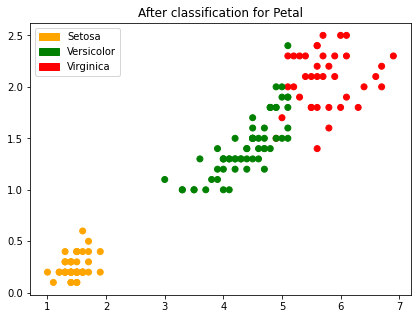

In [145]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 2)
plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[predictedY])
plt.title("After classification for Petal")
plt.legend(handles=[orange_patch, green_patch, red_patch])

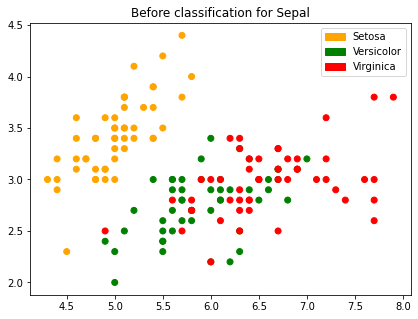

In [146]:
plt.figure(figsize=(15,5))

colors = np.array(['orange', 'green', 'red'])

predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)
plt.subplot(1, 2, 1)
plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[y['Target']])
plt.title('Before classification for Sepal')
plt.legend(handles=[orange_patch, green_patch, red_patch])

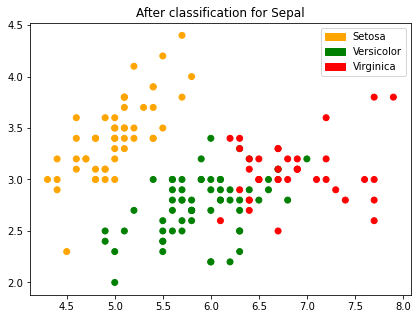

In [147]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 2)
plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[predictedY])
plt.title("After classification for Sepal")
plt.legend(handles=[orange_patch, green_patch, red_patch])

Accuracy prediction

In [148]:
print( "Accuracy of this model is ", sm.accuracy_score(predictedY, y['Target']))

Accuracy of this model is  0.8933333333333333
